<a href="https://colab.research.google.com/github/whiteknight40/Machine_learning_libraries/blob/main/Binary_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Logistic Regression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving binary_classification_train.csv to binary_classification_train.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file=pd.read_csv('binary_classification_train.csv')
print(file.shape)

(48000, 22)


In [ ]:
n_sets, n_features=file.shape
n_features=n_features-1
x_train=file.iloc[:,1:n_features]
x_train=x_train.values
y_train=file.iloc[:,n_features]
y_train=y_train.values
print(x_train.shape)
print(y_train.shape)

(48000, 20)
(48000,)


In [ ]:
def train_test_split(X,y,test_size=0.2,random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  indices=np.arange(len(X))
  np.random.shuffle(indices)
  split_idx=int(len(X)*(1-test_size))
  train_indices=indices[:split_idx]
  test_indices=indices[split_idx:]
  X_train, X_test=X[train_indices],X[test_indices]
  y_train, y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train, y_test

In [ ]:
def sigmoid(z):
  sig=1/(1+np.exp(-z))
  return sig

In [ ]:
def cost(X,y,w,b):
  m,_=X.shape
  z=np.dot(X,w)+b
  f_wb=sigmoid(z)
  cost=(-1/m) * np.sum(y * np.log(f_wb) + (1-y) * np.log(1-f_wb))
  return cost

In [ ]:
def compute_gradient(X,y,w,b):
  m,n=X.shape
  dj_dw=np.zeros(n)
  dj_db=0.
  cosht=sigmoid(np.dot(X,w)+b)-y
  dj_dw=np.dot(X.T,cosht)/m
  dj_db=np.sum(cosht)/m
  return dj_dw, dj_db

In [ ]:
def gradient_descent(X, y, w_init, b_init, alpha, batch_size, n_iterations):
    w = w_init.copy()
    b = b_init
    m = X.shape[0]
    J_history = []

    for iteration in range(n_iterations):
        for batch_start in range(0, m, batch_size):
            batch_end = min(batch_start + batch_size, m)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]

            dj_dw, dj_db = compute_gradient(X_batch, y_batch, w, b)
            w -= alpha * dj_dw
            b -= alpha * dj_db

        if iteration % 100 == 0:
            J = cost(X, y, w, b)
            J_history.append(J)
            print(f"Iteration {iteration:4d}: Cost {J:8f}")
    print(f"Final cost: {J_history[-1]}")

    return w, b, J_history

In [ ]:
def compute_mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

In [ ]:
def compute_precision(y_true, y_pred):
    y_pred=1-y_pred
    TP = np.sum((y_true == 1) * (y_pred == 1))
    FP = np.sum((y_true == 0) * (y_pred == 1))
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
    return precision

In [ ]:
def compute_recall(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return recall

Iteration    0: Cost 0.429431
Iteration  100: Cost 0.245109
Iteration  200: Cost 0.244549
Iteration  300: Cost 0.244366
Iteration  400: Cost 0.244288
Iteration  500: Cost 0.244251
Iteration  600: Cost 0.244232
Iteration  700: Cost 0.244221
Iteration  800: Cost 0.244213
Iteration  900: Cost 0.244207
Final cost: 0.24420694450650118



b,w found by gradient descent: -0.00,[ 5.19e-03 -4.22e-04 -1.16e-04 -8.02e-03 -9.49e-05  1.92e-02  2.32e-03
  3.06e-03  3.46e-03  6.06e-04 -1.13e-03 -2.70e-04 -1.44e-03  1.18e-03
  1.64e-03 -1.08e-02  1.59e-02 -9.56e-03  3.84e-03  9.27e-03] 
Final cost: 0.2574905075234777



Mean squared error: 0.06947916666666666

Accuracy: 93.05208333333333

Precision: 0.06895037329819939

Recall: 0.84526938239159

F1 score: 0.1275002844572406


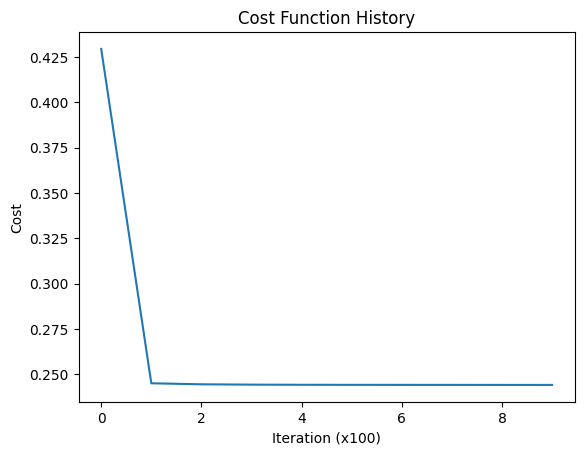

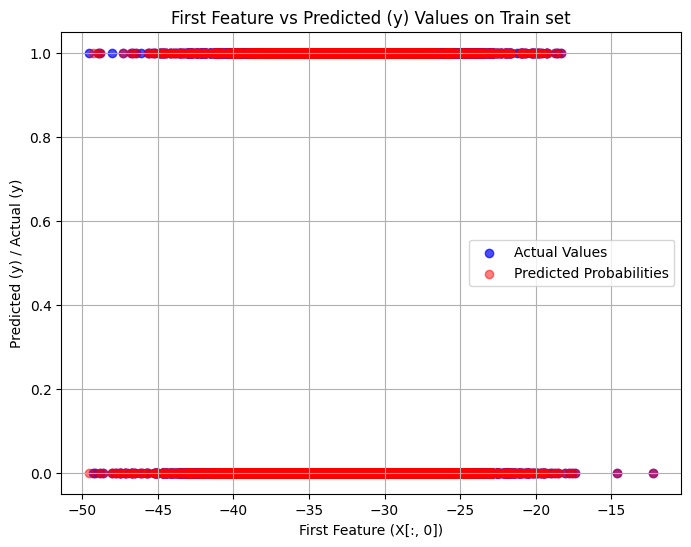

In [ ]:
X_train,X_test, y_train, y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
m,n=X_train.shape
w_initial=np.zeros(n)
b_initial=0.
alpha=5e-07
batch_size=100
n_iterations=1000
w_final,b_final,J_history=gradient_descent(X_train,y_train,w_initial,b_initial,alpha, batch_size,n_iterations)
print(f"\n\n\nb,w found by gradient descent: {b_final:0.2f},{w_final} ")
print(f"Final cost: {cost(X_test,y_test,w_final,b_final)}")
y_pred=sigmoid(np.dot(X_test,w_final)+b_final)>=0.5
accuracy=np.mean(y_pred == y_test)*100
mse=compute_mean_squared_error(y_test,y_pred)
precision=compute_precision(y_test,y_pred)
recall=compute_recall(y_test,y_pred)
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall)!=0 else 0
print(f"\n\n\nMean squared error: {mse}")
print(f"\nAccuracy: {accuracy}")
print(f"\nPrecision: {precision}")
print(f"\nRecall: {recall}")
print(f"\nF1 score: {f1}")
plt.plot(range(len(J_history)),J_history)
plt.xlabel("Iteration (x100)")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.show()

y_pred_probs = sigmoid(np.dot(X_test, w_final) + b_final)>=0.5
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color="blue", alpha=0.7, label="Actual Values")
plt.scatter(X_test[:, 0], y_pred_probs, color="red", alpha=0.5, label="Predicted Probabilities")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted (y) / Actual (y)")
plt.title("First Feature vs Predicted (y) Values on Train set")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving binary_classification_test.csv to binary_classification_test.csv


In [ ]:
import pandas as pd
file = pd.read_csv('binary_classification_test.csv')
print(file.shape)

(12000, 21)


In [ ]:
n_sets,n_features=file.shape
x_test=file.iloc[:,1:n_features]
x_test=x_test.values

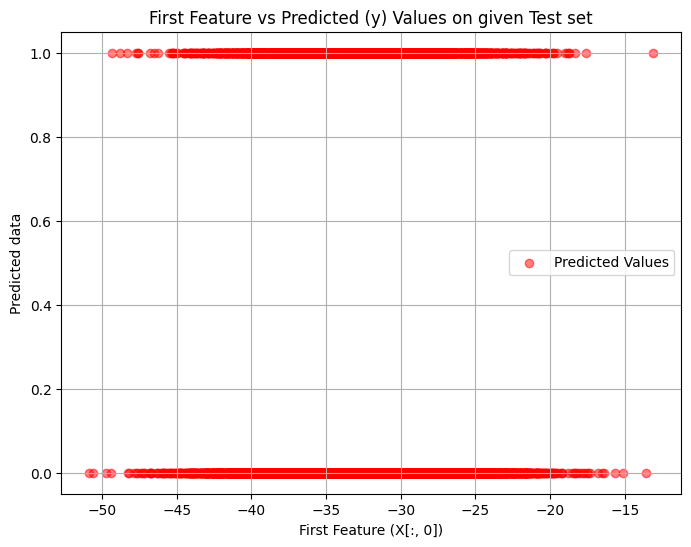

In [ ]:
y_pred_test=sigmoid(np.dot(x_test,w_final)+b_final)>=0.5
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], y_pred_test, color="red", alpha=0.5, label="Predicted Values")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Predicted data")
plt.title("First Feature vs Predicted (y) Values on given Test set")
plt.legend()
plt.grid(True)
plt.show()